In [1]:
import numpy as np
from random import shuffle

In [2]:
numberRuns = 2000

In [3]:
spots= ['Start','Dorpstraat','Algemeen Fonds','Brink','Ink. Belasting','Station Zuid',
       'Steenstraat','Kans','Ketelstraat','Velperplein','Op Bezoek','Barteljorisstraat','Elektra','Zulweg','Houtstraat','Station West',
       'Neude','Algemeen fonds','Bilstraat','Vreeburg','Vrij Parkeren','A-Kerkhof','Kans','Groote markt',
       'Heerestraat','Station Noord','Spui','Plein','WaterBelasting','Lange Poten','Naar Gevangenis','Hofplein','Blaak','Algemeen Fonds','Coolsingel','Station Oost',
       'Kans','Leidsche Straat','Extra Belasting','Kalverstraat']
numberSpots = len(spots)


In [4]:
#Cards
Kans = [0,'Nut','Station West','Start','Gevangenis',0,'Heerestraat',0
       ,0,-3,0,0,'Station','Kalverstraat','Station','Kalverstraat']

AlgemeenFonds = [0,0,0,0,0,0,0,0,0,0,'Start','Gevangenis',0,0,0,0]
shuffle(Kans)
shuffle(AlgemeenFonds)

In [5]:
def throwDice():
    return np.random.randint(1,7)

def pickCard(deck):
    card = deck.pop(0)
    deck.append(card)
    return card
def pickStation(currentPosition):
    result=0
    if currentPosition<spots.index('Station Zuid') or spots.index('Station Oost')<currentPosition<40:
        result = spots.index('Station Zuid')
    elif spots.index('Station Zuid')<currentPosition<spots.index('Station West'):
        result=spots.index('Station West')
    elif spots.index('Station West')<currentPosition<spots.index('Station Noord'):
        result=spots.index('Station Noord')
    else: result = spots.index('Station Oost')
    return result

# Simulation

In [6]:
class Player:
    def __init__(self, position,doubleThrows,inJail,turnsInJail,passages,jailTime):
        self.position=position
        self.doubleThrows=doubleThrows
        self.inJail=inJail
        self.turnsInJail=turnsInJail
        self.passages = passages
        self.jailTime = jailTime
    
    def jailed(self):
        return self.inJail
    
    def doubleThrowLeaveJail(self):
        self.doubleThrows+=1
        self.inJail=False
        self.turnsInJail=0
        self.position=10
        
    def threeRowJail(self):
        self.inJail=False
        self.turnsInJail=0
        self.position = 10
        
    def remainJailed(self):
        self.turnsInJail+=1
        self.jailTime+=1
        
    def goToJail(self):
        self.inJail=True
        self.turnsInJail=1
        self.jailTime+=1
        self.position = None
        
    def visit(self):
        self.passages[self.position]+=1
        
    def procesCard(self,card,spots,numberSpots):
        if card=='Nut': 
            if 12<self.position<28:
                self.position = spots.index('WaterBelasting')
            else: 
                self.position = spots.index('Elektra')
        elif card == 'Station':
            self.position = pickStation(self.position)
        elif card ==-3: 
            self.position = (self.position -3) % numberSpots
        elif card == 'Gevangenis':
            self.goToJail()
        elif card!=0:
            self.position = spots.index(card)
            
    def move(self,numberSpots,T1,T2):
        self.position=(self.position + T1 + T2)%numberSpots
        
    def JT(self):
        return self.jailTime/numberRuns
    
    
    
        

In [7]:
def simulateRuns(numberRuns):
    player = Player(0,0,False,0,[0]*numberSpots,0)
    for turn in range(numberRuns):
        if not player.jailed():
            player.visit()
        T1 = throwDice()
        T2 = throwDice()
        if (player.jailed()):
            #print(turn,player.turnsInJail,player.jailTime)
            if T1==T2:
                player.doubleThrowLeaveJail()
                player.move(numberSpots,T1,T2)
            elif(player.turnsInJail==3):
                player.threeRowJail()
            else:player.remainJailed()
        else:
            if ((player.doubleThrows == 2 and T1==T2) or spots[player.position]=='Naar Gevangenis'):
                player.goToJail()
                if (player.doubleThrows == 2 and T1==T2): player.doubleThrows=0 
            else:
                if not player.jailed():
                    player.move(numberSpots,T1,T2)
                    if (T1==T2): player.doubleThrows+=1
                if (spots[player.position]=='Kans'):
                    card = pickCard(Kans)
                    player.procesCard(card,spots,numberSpots)
                elif (spots[player.position]=='Algemeen Fonds'):
                    card = pickCard(AlgemeenFonds)
                    player.procesCard(card,spots,numberSpots)
                
        
    return (player.passages,player.JT())


In [8]:
simulation=simulateRuns(numberRuns)
jailTime = simulation[1]
passages = simulation[0]
passagesPerc = [i/numberRuns for i in passages]

indexArray=sorted(range(len(passagesPerc)), key=lambda k: passagesPerc[k],reverse=True)




# Display Monopoly board

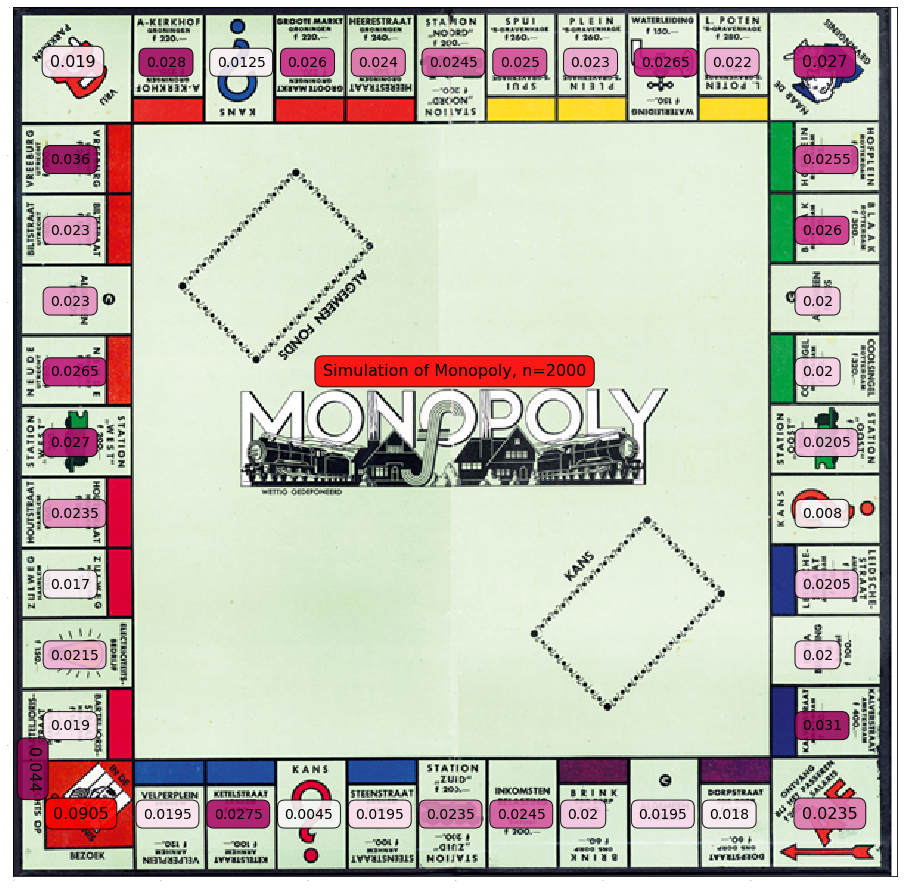

In [13]:
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 32, 16
  
color=cm.PiYG(np.linspace(0,0.5,numberSpots))

    
# Read Images 
img = mpimg.imread('monopoly.jpg')
plt.text(210,250,"Simulation of Monopoly, n="+str(numberRuns),fontsize=16,bbox=dict(facecolor='red', alpha=0.9,boxstyle='round,pad=0.5'))
plt.text(27,550,round(jailTime,4),fontsize=16,bbox=dict(facecolor='red', alpha=0.9,boxstyle='round,pad=0.5'))
plt.text(535,550,round(passagesPerc[0],4),fontsize=16,bbox=dict(facecolor=color[indexArray.index(0)], alpha=0.9,boxstyle='round,pad=0.5'))
plt.text(8,530,round(passagesPerc[10],4),fontsize=16,bbox=dict(facecolor=color[indexArray.index(10)], alpha=0.9,boxstyle='round,pad=0.5'),rotation=270)
plt.text(25,40,round(passagesPerc[20],4),fontsize=16,bbox=dict(facecolor=color[indexArray.index(20)], alpha=0.9,boxstyle='round,pad=0.5'))
plt.text(535,40,round(passagesPerc[30],4),fontsize=16,bbox=dict(facecolor=color[indexArray.index(30)], alpha=0.9,boxstyle='round,pad=0.5'))
for i in range(1,10):
    plt.text(472-48*(i-1),550,round(passagesPerc[i],4),fontsize=14,bbox=dict(facecolor=color[indexArray.index(i)], alpha=0.9,boxstyle='round,pad=0.5'))
    plt.text(25,490-48*(i-1),round(passagesPerc[i+10],4),fontsize=14,bbox=dict(facecolor=color[indexArray.index(i+10)], alpha=0.9,boxstyle='round,pad=0.5'))
    plt.text(90+48*(i-1),40,round(passagesPerc[i+20],4),fontsize=14,bbox=dict(facecolor=color[indexArray.index(i+20)], alpha=0.9,boxstyle='round,pad=0.5'))
    plt.text(535,106+48*(i-1),round(passagesPerc[30+i],4),fontsize=14,bbox=dict(facecolor=color[indexArray.index(i+30)], alpha=0.9,boxstyle='round,pad=0.5'))
# Output Images 

plt.tick_params(axis='both', labelsize=0, length = 0)

plt.imshow(img) 

In [10]:
print('Beste locaties')
for index in indexArray[0:10]: 
    print('\t',spots[index])
    
print('Slechtste locaties')
for index in indexArray[-10:-1]: 
    print('\t',spots[index])



Beste locaties
	 Op Bezoek
	 Vreeburg
	 Kalverstraat
	 A-Kerkhof
	 Ketelstraat
	 Station West
	 Naar Gevangenis
	 Neude
	 WaterBelasting
	 Groote markt
Slechtste locaties
	 Algemeen Fonds
	 Steenstraat
	 Velperplein
	 Barteljorisstraat
	 Vrij Parkeren
	 Dorpstraat
	 Zulweg
	 Kans
	 Kans
